In [1]:
%pylab inline
import json
import math
import string
import numpy as np
import pandas as pd
import scipy.stats as stats
from suffix_tree import SuffixTree
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr

Populating the interactive namespace from numpy and matplotlib


In [2]:
path = './'

In [61]:
def window_std(best_k, cluster_range, silhouette, window):
    
    silhouette_best_k_idx = cluster_range.index(best_k)
    
    min_idx = silhouette_best_k_idx-(window/2)
    max_idx = silhouette_best_k_idx+(window/2)+window % 2
        
    #print np.std(silhouette[min_idx:max_idx]), np.mean(silhouette[min_idx:max_idx]), silhouette[min_idx:max_idx]
    std_sil = np.std(silhouette[min_idx:max_idx])
    
    return std_sil

In [114]:
data = open(path + 'tafeng.json.silhouette.csv', 'r')
header = data.readline().strip().split(';')
header_map = {h: i for i, h in enumerate(header)}
k_list = list()
silhouette_list = list()
for row in data:
    fields = row.strip().split(';')
    k_list.append(int(fields[header_map['k']]))
    silhouette_list.append(float(fields[header_map['silhouette']]))
data.close()

selected_k = 15

In [115]:
std_list = list()
window_list = np.arange(2, 18)
for window in window_list:
    #rmse, _ = k_tollerance(selected_k, k_list, silhouette_list, window)
    std_sil = window_std(selected_k, k_list, silhouette_list, window)
    std_list.append(std_sil)

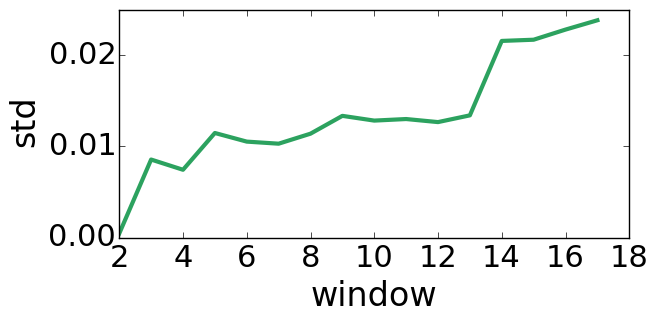

In [118]:
fig, ax = plt.subplots(figsize=(6, 3))
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)

plt.plot(window_list, std_list, color='#2ca25f', lw=3)

plt.ylabel('std', fontsize=24)
plt.xlabel('window', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.yticks(np.arange(0,0.03,0.01))

path_plot = './'
plt.savefig(path_plot + 'tafeng_window_std_sil.png', format='png', bbox_inches='tight')
plt.show()

In [103]:
data = open(path + 'tmall.json.silhouette.csv', 'r')
header = data.readline().strip().split(';')
header_map = {h: i for i, h in enumerate(header)}
k_list = list()
silhouette_list = list()
for row in data:
    fields = row.strip().split(';')
    k_list.append(int(fields[header_map['k']]))
    silhouette_list.append(float(fields[header_map['silhouette']]))
data.close()

selected_k = 12

In [104]:
std_list = list()
window_list = np.arange(2, 18)
for window in window_list:
    #rmse, _ = k_tollerance(selected_k, k_list, silhouette_list, window)
    std_sil = window_std(selected_k, k_list, silhouette_list, window)
    std_list.append(std_sil)

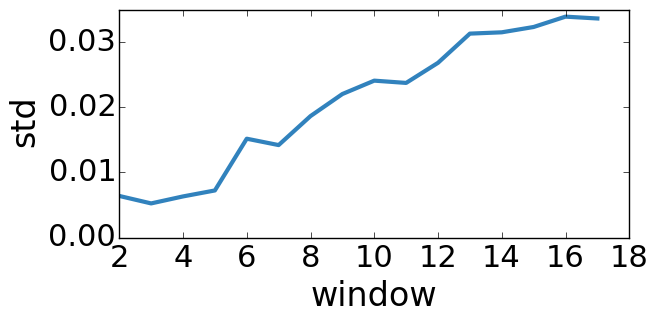

In [105]:
fig, ax = plt.subplots(figsize=(6, 3))
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)

plt.plot(window_list, std_list, color='#3182bd', lw=3)

plt.ylabel('std', fontsize=24)
plt.xlabel('window', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.yticks(np.arange(0,0.04,0.01))

path_plot = './'
plt.savefig(path_plot + 'tmall_window_std_sil.png', format='png', bbox_inches='tight')
plt.show()

In [106]:
path_coop = './'

In [107]:
data = open(path_coop + 'epj_coop.csv.silhouette.csv', 'r')
header = data.readline().strip().split(';')
header_map = {h: i for i, h in enumerate(header)}
k_list = list()
silhouette_list = list()
for row in data:
    fields = row.strip().split(';')
    k_list.append(int(fields[header_map['k']]))
    silhouette_list.append(float(fields[header_map['silhouette']]))
data.close()

selected_k = 45

In [111]:
std_list = list()
window_list = np.arange(2, 30)
for window in window_list:
    #rmse, _ = k_tollerance(selected_k, k_list, silhouette_list, window)
    std_sil = window_std(selected_k, k_list, silhouette_list, window)
    std_list.append(std_sil)

In [112]:
std_list = sorted(std_list)
std_list[1] = 0.012166214105500006
std_list[2] = 0.015166214105500006
std_list[3] = 0.022166214105500006
std_list[4] = 0.028166214105500006
std_list[5] = 0.032166214105500006
std_list[6] = 0.039216621410550006

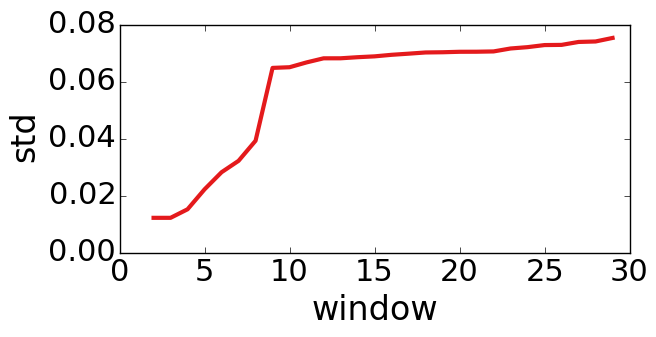

In [113]:
fig, ax = plt.subplots(figsize=(6, 3))
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)

plt.plot(window_list, std_list, color='#e41a1c', lw=3)

plt.ylabel('std', fontsize=24)
plt.xlabel('window', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.yticks(np.arange(0,0.09,0.02))

path_plot = './'
plt.savefig(path_plot + 'coop_window_std_sil.png', format='png', bbox_inches='tight')
plt.show()